<a href="https://colab.research.google.com/github/AaryanGole26/PRODIGY_DS/blob/PRODIGY_DS_02/Prodigy_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplt
import matplotlib.ticker as ticker
import time
from google.colab import files

In [4]:
uploadfiles = files.upload()

Saving train.csv to train.csv


In [5]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.shape

(891, 12)

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [11]:
df.drop('Cabin', axis=1, inplace=True)

In [12]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


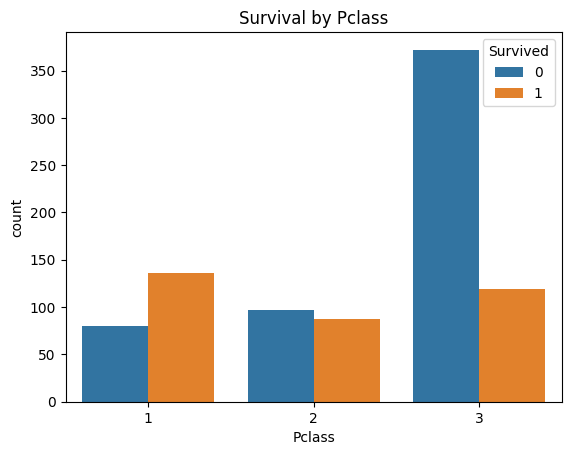

In [13]:
sns.countplot(x='Pclass', hue='Survived', data=df)
pyplt.title('Survival by Pclass')
pyplt.show()

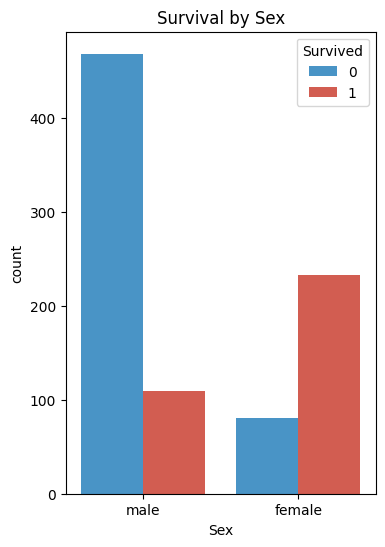

In [14]:
custom_colors = ["#3498db", "#e74c3c"]
pyplt.figure(figsize=(4, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette=custom_colors)
pyplt.title('Survival by Sex')
pyplt.show()

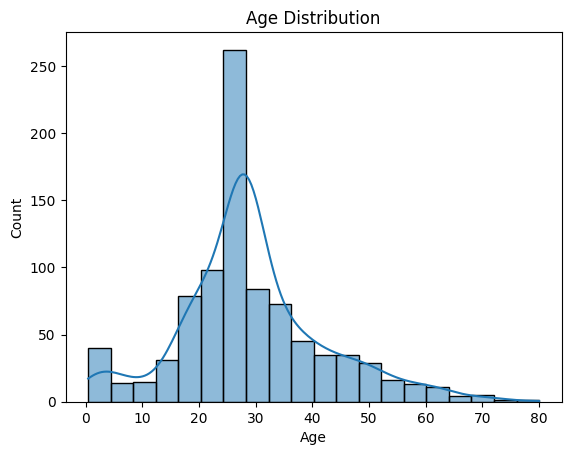

In [15]:
sns.histplot(df['Age'], bins=20, kde=True)
pyplt.title('Age Distribution')
pyplt.show()

<ipython-input-16-586d7eef6824>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


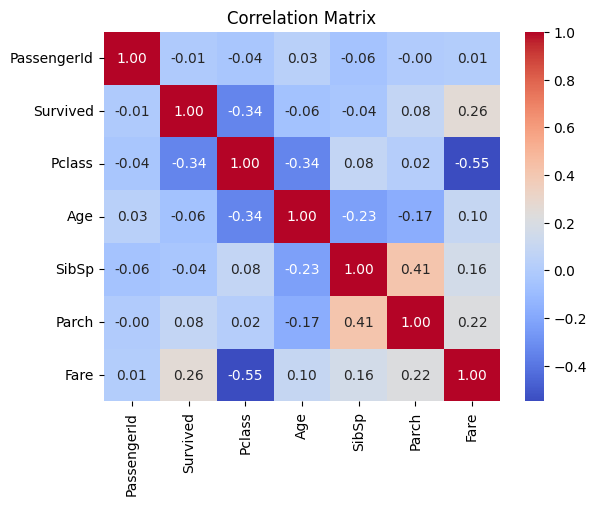

In [16]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
pyplt.title('Correlation Matrix')
pyplt.show()

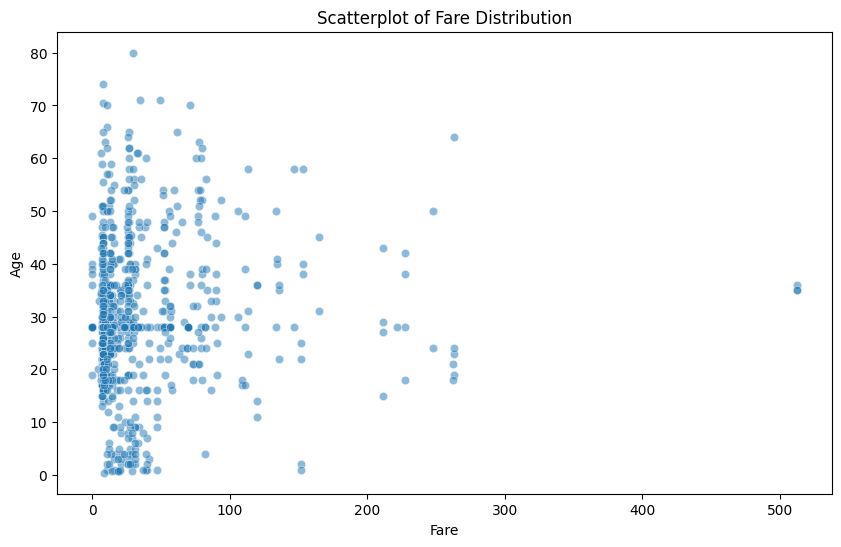

In [17]:
pyplt.figure(figsize=(10, 6))
sns.scatterplot(x='Fare', y='Age', data=df, alpha=0.5)
pyplt.title('Scatterplot of Fare Distribution')
pyplt.xlabel('Fare')
pyplt.ylabel('Age')
pyplt.show()

<Axes: ylabel='Frequency'>

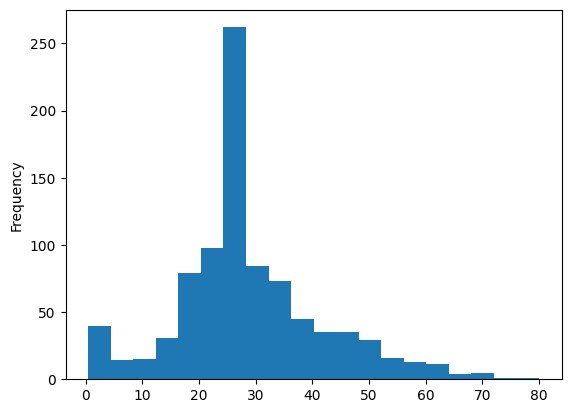

In [18]:
df['Age'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

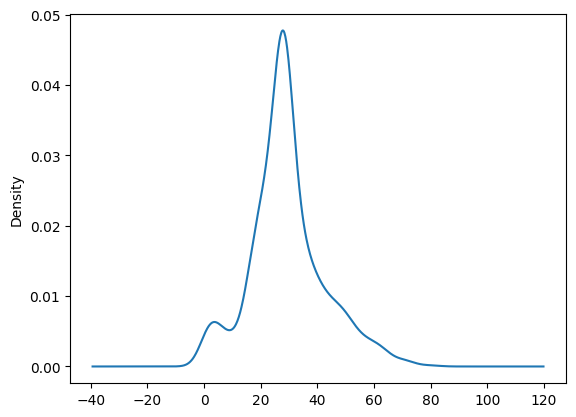

In [19]:
df['Age'].plot(kind='kde')

<Axes: >

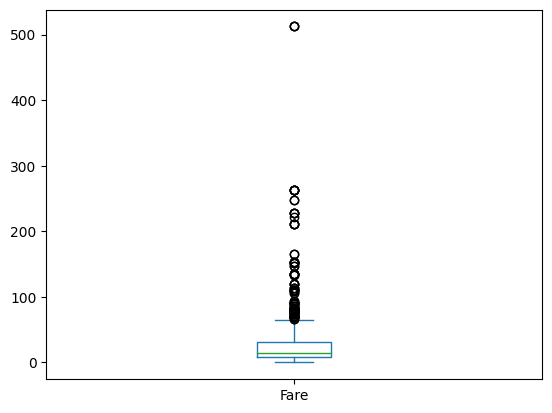

In [20]:
df['Fare'].plot(kind='box')

<Axes: ylabel='Survived'>

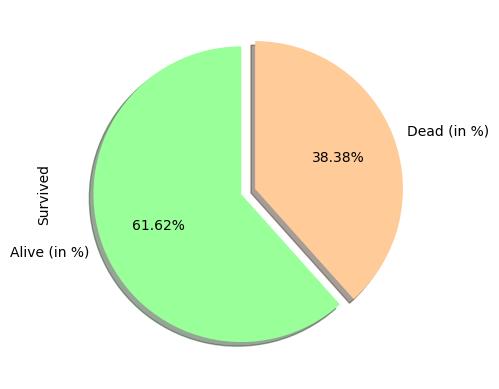

In [35]:
labels = ['Alive (in %)', 'Dead (in %)']
colors = ['#99ff99','#ffcc99']
explode = (0, 0.1)
df['Survived'].value_counts().plot(kind='pie', autopct='%1.2f%%', shadow=True, labels=labels, explode=explode, colors=colors, startangle=90)

<Axes: ylabel='Sex'>

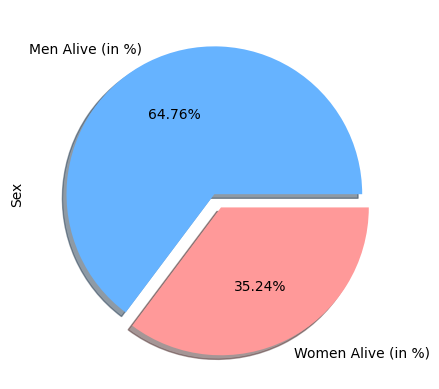

In [33]:
labels = ['Men Alive (in %)', 'Women Alive (in %)']
explode = (0, 0.1)
colors = ['#66b3ff','#ff9999']
df['Sex'].value_counts().plot(kind='pie', autopct='%1.2f%%', shadow=True, labels=labels, explode=explode, colors=colors)

<Axes: xlabel='Pclass', ylabel='Survived'>

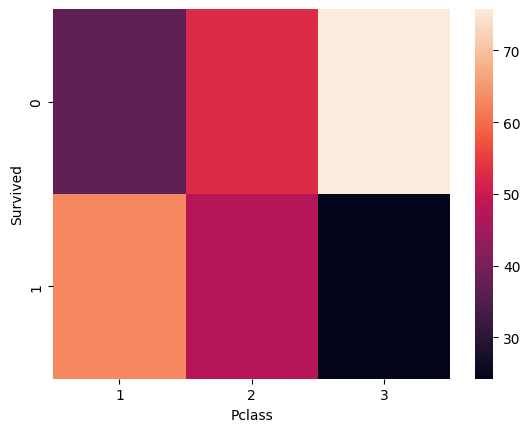

In [36]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100)

In [37]:
uploadfiles = files.upload()

Saving test.csv to test.csv


In [38]:
df1 = pd.read_csv('test.csv')

In [39]:
df = pd.concat([df,df1])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,NaN
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,NaN
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,NaN
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C105
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,NaN
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,NaN


In [40]:
df = df.drop_duplicates()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,NaN
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,NaN
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,NaN
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C105
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,NaN
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,NaN


In [41]:
df[df['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin
159,160,0.0,3,"Sage, Master. Thomas Henry",male,28.0,8,2,CA. 2343,69.55,S,NaN
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,28.0,8,2,CA. 2343,69.55,S,NaN
201,202,0.0,3,"Sage, Mr. Frederick",male,28.0,8,2,CA. 2343,69.55,S,NaN
324,325,0.0,3,"Sage, Mr. George John Jr",male,28.0,8,2,CA. 2343,69.55,S,NaN
792,793,0.0,3,"Sage, Miss. Stella Anna",female,28.0,8,2,CA. 2343,69.55,S,NaN
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.55,S,NaN
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.55,S,NaN
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,S,NaN
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,S,NaN
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,S,NaN


In [42]:
df['Ticket'].value_counts()

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

In [43]:
df[df['Ticket'] == '1601']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin
74,75,1.0,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,S,NaN
169,170,0.0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,S,NaN
509,510,1.0,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,S,NaN
643,644,1.0,3,"Foo, Mr. Choong",male,28.0,0,0,1601,56.4958,S,NaN
692,693,1.0,3,"Lam, Mr. Ali",male,28.0,0,0,1601,56.4958,S,NaN
826,827,0.0,3,"Lam, Mr. Len",male,28.0,0,0,1601,56.4958,S,NaN
838,839,1.0,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,S,NaN
39,931,NaN,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,S,NaN


In [44]:
df['individual_fare'] = df['Fare']/(df['SibSp'] + df['Parch'] + 1)

In [45]:
df['individual_fare']

0        3.625000
1       35.641650
2        7.925000
3       26.550000
4        8.050000
          ...    
413      8.050000
414    108.900000
415      7.250000
416      8.050000
417      7.452767
Name: individual_fare, Length: 1309, dtype: float64

<Axes: >

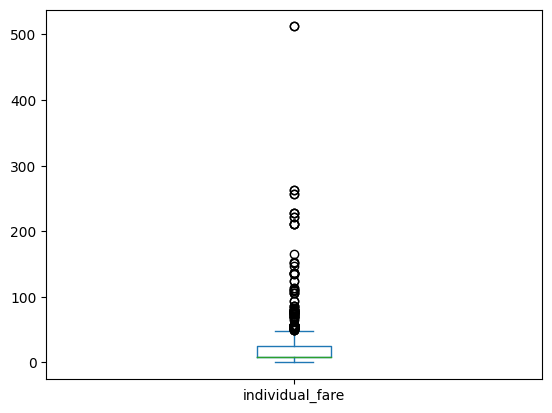

In [46]:
df['individual_fare'].plot(kind='box')

In [47]:
df[['individual_fare','Fare']].describe()

,individual_fare,Fare
count,1308.000000,1308.000000
mean,20.518215,33.295479
std,35.774337,51.758668
min,0.000000,0.000000
25%,7.452767,7.895800
50%,8.512483,14.454200
75%,24.237500,31.275000
max,512.329200,512.329200


In [48]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1

In [49]:
df['family_size']

0      2
1      2
2      1
3      2
4      1
      ..
413    1
414    1
415    1
416    1
417    3
Name: family_size, Length: 1309, dtype: int64

In [50]:
def transform_family_size(num):

  if num == 1:
   return 'alone'
  elif num>1 and num<5:
    return 'small'
  else:
    return 'large'


In [51]:
df['family_type'] = df['family_size'].apply(transform_family_size)

In [52]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin,individual_fare,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,NaN,3.625000,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,NaN,35.641650,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN,7.925000,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,NaN,26.550000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,NaN,8.050000,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,NaN,8.050000,1,alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C105,108.900000,1,alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,NaN,7.250000,1,alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,NaN,8.050000,1,alone


In [53]:
df['Surname'] =  df['Name'].str.split(',').str.get(0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin,individual_fare,family_size,family_type,Surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,NaN,3.625000,2,small,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,NaN,35.641650,2,small,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN,7.925000,1,alone,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,NaN,26.550000,2,small,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,NaN,8.050000,1,alone,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,NaN,8.050000,1,alone,Spector
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C105,108.900000,1,alone,Oliva y Ocana
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,NaN,7.250000,1,alone,Saether
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,NaN,8.050000,1,alone,Ware


In [54]:
df['title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)
df['title'].value_counts()


Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: title, dtype: int64

In [55]:
df['title'] = df['title'].str.replace('Rev.','other')
df['title'] = df['title'].str.replace('Dr.','other')
df['title'] = df['title'].str.replace('Col.','other')
df['title'] = df['title'].str.replace('Major.','other')
df['title'] = df['title'].str.replace('Capt.','other')
df['title'] = df['title'].str.replace('the.','other')
df['title'] = df['title'].str.replace('Jonkheer.','other')

<ipython-input-55-ea5a22502664>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('Rev.','other')
<ipython-input-55-ea5a22502664>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('Dr.','other')
<ipython-input-55-ea5a22502664>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('Col.','other')
<ipython-input-55-ea5a22502664>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('Major.','other')
<ipython-input-55-ea5a22502664>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('Capt.','other')
<ipython-input-55-ea5a22502664>:6: FutureWarning: The default value of re

In [56]:
temp_df = df[df['title'].isin(['Mr.','Mrs.','Miss.','Master.','oother'])]

In [57]:
pd.crosstab(temp_df['Survived'],temp_df['title'],normalize='columns')*100

title,Master.,Miss.,Mr.,Mrs.,oother
Survived,,,,,
0.0,42.5,30.21978,84.332689,20.8,72.222222
1.0,57.5,69.78022,15.667311,79.2,27.777778


In [58]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin,individual_fare,family_size,family_type,Surname,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,NaN,3.625000,2,small,Braund,Mr.
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,NaN,35.641650,2,small,Cumings,Mrs.
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN,7.925000,1,alone,Heikkinen,Miss.
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,NaN,26.550000,2,small,Futrelle,Mrs.
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,NaN,8.050000,1,alone,Allen,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,NaN,8.050000,1,alone,Spector,Mr.
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C105,108.900000,1,alone,Oliva y Ocana,Dona.
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,NaN,7.250000,1,alone,Saether,Mr.
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,NaN,8.050000,1,alone,Ware,Mr.


In [59]:
df['Cabin'].isnull().sum()/len(df['Cabin'])*100
df['Cabin'].value_counts().head(15)


B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
F4                 2
C6                 2
C23 C25 C27        2
C31                2
C101               2
C80                2
E34                2
C78                2
C116               2
C22 C26            1
Name: Cabin, dtype: int64

In [60]:
df['Cabin'].fillna('M',inplace=True)

In [61]:
df['Cabin'].value_counts()


M                  1218
B57 B59 B63 B66       3
C89                   2
C116                  2
C80                   2
                   ... 
E45                   1
E52                   1
B58 B60               1
C62 C64               1
C105                  1
Name: Cabin, Length: 77, dtype: int64

In [62]:
df['deck'] = df['Cabin'].str[0]

In [63]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin,individual_fare,family_size,family_type,Surname,title,deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,M,3.625000,2,small,Braund,Mr.,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,M,35.641650,2,small,Cumings,Mrs.,M
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,M,7.925000,1,alone,Heikkinen,Miss.,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,M,26.550000,2,small,Futrelle,Mrs.,M
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,M,8.050000,1,alone,Allen,Mr.,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,M,8.050000,1,alone,Spector,Mr.,M
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C105,108.900000,1,alone,Oliva y Ocana,Dona.,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,M,7.250000,1,alone,Saether,Mr.,M
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,M,8.050000,1,alone,Ware,Mr.,M


In [64]:
df['deck'].value_counts()


M    1218
C      35
B      18
D      13
E       9
F       8
A       7
G       1
Name: deck, dtype: int64

In [65]:
pd.crosstab(df['Survived'] , df['deck'], normalize='columns')*100

deck,M
Survived,
0.0,61.616162
1.0,38.383838
